In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from src import *
datadir = Path('../../data/raw')

# Data visualisation

In the previous course, raw statistics have been computed to answer some questions about the dataset.
However, raw numbers are not always the best solution to understand data, and are rarely so to communicate this knowledge.
In particular, Anscomb has create 4 datasets which look similar under basic statistics but have extremely different properties.
As a result, plotting data is often a good step to better understand data.


![Anscombe quartet](../../figures/wikipedia_anscombe_quartet.svg)


We will use the matplolib library.
This is a low level library which require a bit more code but allows a precise control of the different plotted elements.
Higher level libraries (seaborn) lie on top of matplotlib anyway.
[Ressources](https://matplotlib.org/3.3.1/tutorials/index.html) are available to dig deeper into the library.

In [ ]:
fn = datadir  / 'OPEN_MEDIC_2019.zip'
df = pd.read_csv(fn, sep=';', encoding='latin1', decimal=',', thousands='.')
df['taux_rembourse'] = df['REM'] / df['BSE']

match_prescriptor = pd.read_csv(ROOTDIR / 'references' / 'open_medic_match_prescriptor.csv')
dict_prescriptor = {k:v for k, v in match_prescriptor.values}
df['l_sps_spe'] = df['PSP_SPE'].map(dict_prescriptor)

match_regions = pd.read_csv(ROOTDIR / 'references' / 'open_medic_match_region.csv')
dict_regions = {k:v for k, v in match_regions.values}
df['l_ben_reg'] = df['BEN_REG'].map(dict_regions)

print(df.shape)
df.head()

(1829859, 24)


ATC1                           l_ATC1 ATC2                        L_ATC2  \
0    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
1    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
2    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
3    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
4    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   

   ATC3                        L_ATC3   ATC4  \
0  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
1  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
2  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
3  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
4  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   

                                   L_ATC4     ATC5           L_ATC5  ...  age  \
0  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...    0   
1  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...    0   
2  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...    0   
3  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...    0   
4  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...    0   

  sexe BEN_REG  PSP_SPE  BOITES    REM     BSE  taux_rembourse  \
0    1       5        1     113  53.31  191.53        0.278338   
1    1       5       12     152  77.60  258.68        0.299985   
2    1       5       90      74  33.50  126.72        0.264362   
3    1       5       98      13   6.56   21.87        0.299954   
4    1      11        1     106  39.47  136.74        0.288650   

                l_sps_spe                            l_ben_reg  
0       MEDECINE GENERALE  Régions et Départements d'outre-mer  
1               PEDIATRIE  Régions et Départements d'outre-mer  
2  PRESCRIPTEURS SALARIES  Régions et Départements d'outre-mer  
3                  AUTRES  Régions et Départements d'outre-mer  
4       MEDECINE GENERALE                        Ile-de-France  

[5 rows x 24 columns]

In [ ]:
no_atc = [x for x in df.columns if 'ATC' not in x]

## Matplotlib

Matplotlib is the baseline python library for generating visualisations.
Once familiar with this one, the reader wish to try more abstract ones (seaborn, plotly).

The base element of a graph in matplotlib is a Figure, which roughly represent a canvas in which there may be different slots for visualisations.
The Figure can contain one or many Axes, which are roughly equivalent to the slots for plots.
Finally, each Axes object will contain many elements constituing the plot itself.
Many different visual objects can be drawn on the same axis.
The following figure sums up this hierachy of elements.

![](../../figures/pyplot_hierarchy.png)

Most of the time, we will focus of creating a single Axes, which may contains multiple drawings on top of each over, for comparison purposes.
Let's look at the type of basic graph that we can create.

## Line plot

The line plot is the most simple representation.
It consists in drawing a line between points, in the order they are provided.

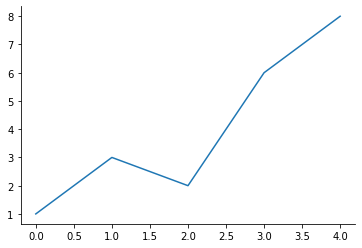

In [ ]:
fig, ax = plt.subplots()
ax.plot([1,3, 2, 6, 8]);

If only a single list of numbers is provided to the plot functions, matplotlib will consider that each element has an abcisse value corresponding to its position in the list.
For example, the value 6 is the fourth element, so it will be printed at the position (3, 6).
Then a line is drawn between the points, in their order of appearance.

However, we can also provide matplotlib with the x values for each point.
The list of X and Y values must be provided separately.

In [ ]:
fig, ax = plt.subplots()
ax.plot([7, 4, 4, 2, 5], [1,3, 2, 6, 8]);

This is the way to draw a fonction of a single variable.

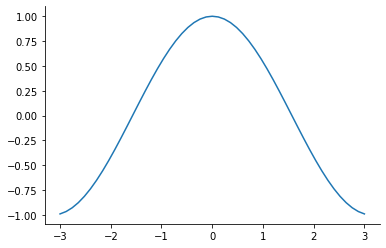

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-3, 3, 51)

# Compute element wise cosinus of all points
y = np.cos(x)

ax.plot(x, y);

## Histogram 
In the previous course, we have observed some contradictory metrics : 
* 84% of refund rate globally
* 78% of mean refund rate per categories
* A standard deviation of 25%

These basic statistics give only a partial information about the dataset.
With experience, we can already understand many elements of the shape of the data.
As with the Anscomb quartet, plotting the data is one of the most powerful tool to understand the data.

An histogram is a basic 1D reprensentation of continuous variables.
It counts how many instances fall into specified intervals, called bins, and represent this metric with a vertical bar chart.
Histogram are effective at quickly understanding how data are distributed.
It is possible to identify highly probable values, if the data are concentrated around a value or spread aver a large range, etc...

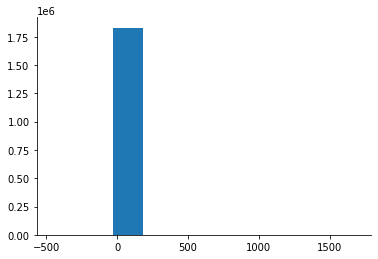

In [ ]:
fig, ax = plt.subplots() # Create the figure and Axes
ax.hist(df.taux_rembourse, #The data : here the list of all values
         bins=10 # how may bins to we want between maximum and minimum
       );

**What does this graph means?**

By default, matplotlib creates 10 intervals between the largest and the smallest value. 
All lines are then stacked into their corresponding bins.
The graph means that almost all values fall into the bin around 0, while there should be at least one value around 1500 and another around -500.
Theses last values are not visible.
Indeed, the central bin has a value around two millions.
Imagine how small are the over bins if they only contain a couple of entries, or even a hundred.
We can howover check that these values actually exist

In [ ]:
df.taux_rembourse.max(), df.taux_rembourse.min()

(1686.764705882353, -461.8913043478261)

We wanted to plot the rate of refund of all categories of medicine.
So we expect our values to be between 0 (no refund at all) and 1 (full refund).
It seems then that we have some abherant values.
Let's look at them.

In [ ]:
df.loc[(df.taux_rembourse>1)|(df.taux_rembourse<0), no_atc]

CIP13                                l_cip13 TOP_GEN  \
25896    3400926954376          OMEPRAZOLE RBX 20MG GELULE 28       G   
44297    3400930060216           OMEPRAZOLE MYP 20MG GELULE 7       0   
45014    3400930060223          OMEPRAZOLE MYP 20MG GELULE 14       0   
47176    3400930060735          OMEPRAZOLE EVP 20MG GELULE 28       0   
57253    3400936284432           OMEPRAZOLE BGA 20MG GELULE 7       G   
...                ...                                    ...     ...   
1738841  3400932279807       VITABACT 0,05% COLLYRE FL 10ML 1       0   
1746172  3400930217412         CHIBRO CADRON COLLYRE FL 5ML 1       0   
1780888  3400931134435  VITAMINE A DULCIS 25 000UI% POMMADE 1       0   
1780889  3400931134435  VITAMINE A DULCIS 25 000UI% POMMADE 1       0   
1780890  3400931134435  VITAMINE A DULCIS 25 000UI% POMMADE 1       0   

         GEN_NUM  age  sexe  BEN_REG  PSP_SPE  BOITES     REM     BSE  \
25896        309   20     1       99        1      13   -0.33   37.82   
44297          0   20     1       99        1      72   -7.18   67.47   
45014          0   20     1       99        1      61  -47.59   71.94   
47176          0   20     1       99        1      13  -18.74   16.44   
57253        309   20     1       99        1      77  -12.35   62.35   
...          ...  ...   ...      ...      ...     ...     ...     ...   
1738841        0   20     1       99       90      20  -11.68   28.49   
1746172        0   20     1       99       90      20  -12.17   39.93   
1780888        0   20     1       99        1      44  -17.84  194.74   
1780889        0   20     1       99       15      52  -39.80  226.38   
1780890        0   20     1       99       90      73 -179.40  317.57   

         taux_rembourse               l_sps_spe l_ben_reg  
25896         -0.008726       MEDECINE GENERALE   Inconnu  
44297         -0.106418       MEDECINE GENERALE   Inconnu  
45014         -0.661523       MEDECINE GENERALE   Inconnu  
47176         -1.139903       MEDECINE GENERALE   Inconnu  
57253         -0.198075       MEDECINE GENERALE   Inconnu  
...                 ...                     ...       ...  
1738841       -0.409968  PRESCRIPTEURS SALARIES   Inconnu  
1746172       -0.304783  PRESCRIPTEURS SALARIES   Inconnu  
1780888       -0.091609       MEDECINE GENERALE   Inconnu  
1780889       -0.175811           OPHTALMOLOGIE   Inconnu  
1780890       -0.564915  PRESCRIPTEURS SALARIES   Inconnu  

[463 rows x 14 columns]

There are 463 lines which do not valid our basic understanding.
There is a very small number of lines which do not valid this hypothesis.
We will remove these values from the plot.
We can give to pyplot arbitrary limits for all the interval.
Points outside of the most extreme limits are not taken into account.

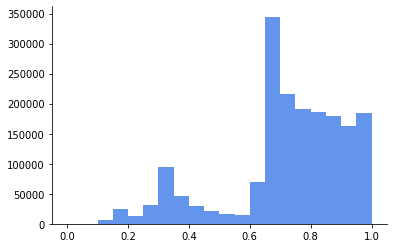

In [ ]:
plt.hist(df.taux_rembourse, 
         bins=np.linspace(0, 1, 21), # create the bin limits, 21 values between 0 and 1 included, generate 20 bins
         color='cornflowerblue' # change the color
        );

Now we can get a better understanding at how good is the refund system.
We see that a majority of categories are refunded with at least 60%.
There is however a minority of categories which have a much lower refund level.
So far, trying to plot the data distribution lead to new questions :
* Why is there values larger than 1 and below 0 ?
* Is here a reason why there is an abrupt discontinuity around 60% of refund?
* What causes lower refunds?

This could be axes of studies in this dataset.
The inputs from experts may be required.

Let's look specicifically on the DOLIPRANE.
We can plot multiple distributions on the same graph by just calling multiple times the same functions.
We can set the parameter alpha, which parametrize how much each plot is transparent, which allows to see first plots.

In [ ]:
is_doliprane = df.l_cip13.str.startswith('DOLIPRANE')

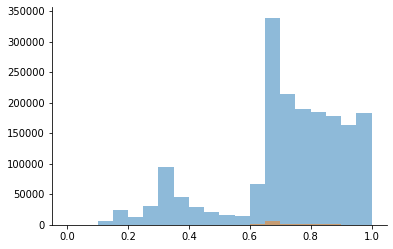

In [ ]:
fig, ax = plt.subplots()
opts = dict(bins=np.linspace(0, 1, 21), 
            alpha=0.5)# make each histogram half transparent
ax.hist(df.loc[~is_doliprane, 'taux_rembourse'], 
        **opts) # is equivalent to key=value for all valrus of the dictionary
ax.hist(df.loc[is_doliprane, 'taux_rembourse'], **opts);

Even though doliprane is one of the most popular medicine, we see that it still represent a very small fraction of all medicine.
It is then difficult to see if doliprane has the same behaviour as the rest.
We can then set the density parameter, which ensure that the area of both histograms are the same

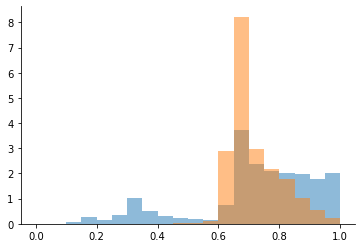

In [ ]:
fig, ax = plt.subplots()
opts = dict(bins=np.linspace(0, 1, 21), 
            density=True, # make all histogram integrals equal 1
            alpha=0.5)

ax.hist(df.loc[~is_doliprane, 'taux_rembourse'], **opts)
ax.hist(df.loc[is_doliprane, 'taux_rembourse'], **opts);

When more than two distributions are represented, it becomes complicated to see which shape represent which histogram when they are superimposed.
Instead, it is a bit more practical to draw histograms as steps.

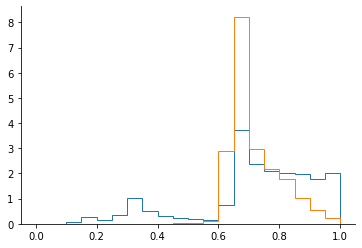

In [ ]:
fig, ax = plt.subplots()
opts = dict(bins=np.linspace(0, 1, 21), density=True, 
            histtype='step') # do not fill thie rectangles)

ax.hist(df.loc[~is_doliprane, 'taux_rembourse'], **opts)
ax.hist(df.loc[is_doliprane, 'taux_rembourse'], **opts);



## Bar graph
We have seen how to represent the distribution of numeric data.
We also have categorical data in the dataset.
We already computed the number of doliprane per prescriptor.
However, a table of number is complicated to apprehend.
It is even more complicated to present to stakeholder not used to this type of data.
Then, there is a way to effectively represent categorical variables.

Bar graph propose to create a rectangle which length will be proportional to the value it represents.
Then each category will have its own rectangle and we can compare the relative size of each by comparing the lengths of their corresponding rectangle.

In [ ]:
mask = df.l_cip13.str.startswith('DOLIPRANE ')

In [ ]:
g = (df[mask]
     .groupby('l_sps_spe')
     .agg({'BOITES' : np.sum})
     .sort_values('BOITES', ascending=True))
print(len(g))
g

25


BOITES
l_sps_spe                                      
ANATOMIE-CYTOLOGIE-PATHOLOGIQUE             831
DIRECTEUR LABORATOIRE MEDECIN              1729
MEDECINE PHYSIQUE ET DE READAPTATION      99855
NEUROLOGIE                               186106
NEPHROLOGIE                              191488
DERMATOLOGIE ET VENEROLOGIE              197579
PNEUMOLOGIE                              199152
VALEUR INCONNUE                          222461
GASTRO-ENTEROLOGIE ET HEPATOLOGIE        251090
ANESTHESIOLOGIE - REANIMATION            279240
MEDECINE INTERNE                         289134
ENDOCRINOLOGIE ET METABOLISMES           296512
RADIOLOGIE                               309828
STOMATOLOGIE                             332571
OPHTALMOLOGIE                            411513
PSYCHIATRIE                              451750
OTO RHINO-LARYNGOLOGIE                   499627
PATHOLOGIE CARDIO-VASCULAIRE             607518
GYNECOLOGIE OBSTETRIQUE                  810049
RHUMATOLOGIE                            2349035
PEDIATRIE                               2826315
CHIRURGIE                               2858709
AUTRES                                  3204817
PRESCRIPTEURS SALARIES                 35304151
MEDECINE GENERALE                     217951151

In [ ]:
plt.barh(g.index.values, g.BOITES.values, color='cornflowerblue');

Here, the y axis represents all the categories present in our dataset.
We have 25 such categories and we can see that it starts to be too much for this figure size.
To have a better visualisation we can either increase the height of the picture, or keep only the top n categories which will fit in the graph.

Let's lookg now at the x axis.
The length of the bar represents the corresponding value.
Here, more than 2 millions boxes of doliprane have been prescribed by general medicine.
Then it falls quite fast, so much that it is impossible to determine how much was prescribed by lower specialties.

In order to see the rest, we can either remove the first values, or plot the x axis in log scale.
Then we can observe the different orders of magnitude of each element.

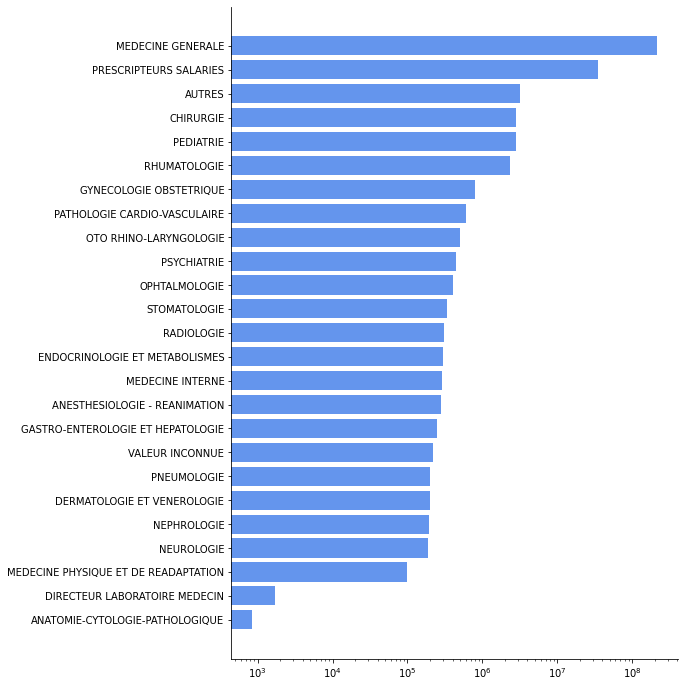

In [ ]:
fig, ax = plt.subplots(figsize=(8, 12)) # Default is 8x6
ax.barh(g.index.values, g.BOITES.values, color='cornflowerblue');
ax.set_xscale('log');

Finally, we represented these data horizontally because it is easier to read the labels.
However, matplotlib proposes exactly the same process with vertical bars.

In [ ]:
fig, ax = plt.subplots()
ax.bar(g.iloc[-10:].index.values, g.iloc[-10:].BOITES.values, color='cornflowerblue')
ax.set_yscale('log')
ax.tick_params(axis='x', labelrotation=90);

We can also produce a similar plot using a bar line.

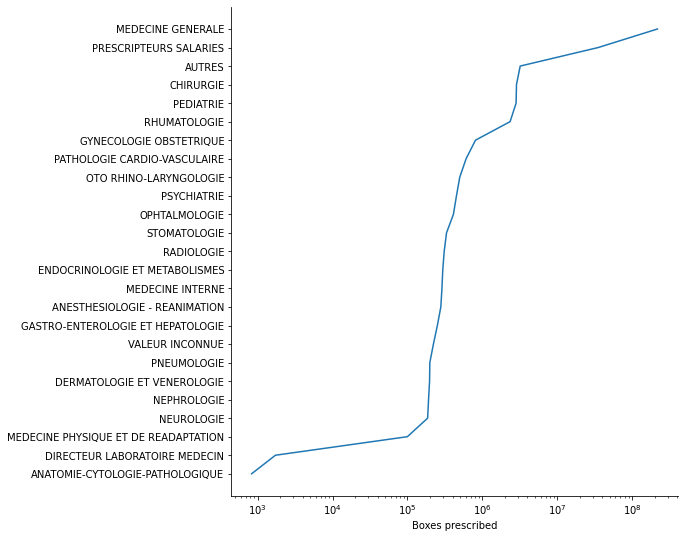

In [ ]:
fig, ax = plt.subplots(figsize=(8, 9))
ax.plot(g.values, range(len(g)))
ax.set_yticks(range(len(g)))
ax.set_yticklabels(g.index)
ax.set_xscale('log')
ax.set_xlabel('Boxes prescribed');

## Scatter plot
scatter plot are the representation of all the combination of two variables in the dataset.
The prupose is to basically plot each point in a 2D representation, which allow to see the shape of the density of the data in this space.

In [ ]:
all_meds = df.groupby('l_cip13').agg({'BOITES' : np.sum, 'BSE':np.mean})
all_meds

BOITES           BSE
l_cip13                                                                 
A313 50 000 UI CAPSULE 30                            42577  4.034247e+02
A313 POMMADE 1                                          29  2.334500e+01
ABACAVIR MYL 300MG CPR 60                             2823  1.294704e+04
ABACAVIR SDZ 300MG CPR 60                              115  2.719070e+03
ABACAVIR/LAM BGA 600 MG/300 MG CPR 30                16777  3.680885e+04
...                                                    ...           ...
ZYPREXA VELOTAB 5MG CPR 28                           37806  6.309014e+03
ZYRTEC 10 MG (DICHLORHYDRATE DE CETIRIZINE) 1 BOIT      44  5.503500e+01
ZYRTEC 10MG/ML BUV FL 15ML 1                         65671  7.249388e+02
ZYTIGA 250 MG CPR 120                                 3985  2.013024e+05
ZYTIGA 500 MG CPR 60                                 74061  1.856029e+06

[11930 rows x 2 columns]

In [ ]:
fig, ax = plt.subplots()
ax.scatter(all_meds.BOITES, all_meds.BSE);
ax.set_xlabel('BOITES')
ax.set_ylabel('BSE');

For each line of our dataset, a scatter plot adds a single point at the corresponding x and y axes.
We then can observe that one medicine has sold around 140 million boses but the the amount refunded is way below 1 million euros.

Still, because of the difference of scale between different medicine, we can't see much of the behaviour of standard medicine.
For that purpose, we need again to go to log scale, and set transparency so have an idea of the density.

We can also plot different categories on top of each over.

In [ ]:
is_doliprane = all_meds.index.str.startswith('DOLIPRANE')

fig, ax = plt.subplots()

ax.scatter(np.maximum(all_meds.loc[~is_doliprane, 'BOITES'], 1), 
          np.abs(all_meds.loc[~is_doliprane, 'BSE']),
           alpha=0.05)


ax.scatter(np.maximum(all_meds.loc[is_doliprane, 'BOITES'], 1), 
          np.abs(all_meds.loc[is_doliprane, 'BSE']),
           alpha=1)
ax.set_xlabel('BOITES')
ax.set_ylabel('BSE')
ax.set_xscale('log')
ax.set_yscale('log')

**What can we observe**
* The dots for DOLIPRANE make are aligned, meaning that all packagings of doliprane have the same rate of refund
* The boxes of DOLIPRANE are at the lower frontier of the distribution, meaning for for a given number of sold boxes, doliprane are among the medicine which generate the less amount of refund. Hence, either the doliprane has a very low rate of refund per boxes, or the doliprane is cheap, or a combination of both.

## Heatmap

We have seen in the exploration dataset that we can represent a metric as a function of two categorical variable by using a pivot table.
However, this kind of visualisation may be a bit complex to analyse when there are many columns and lines.
Instead, we can leverage the ability of the eye to detect pattern.
We will keep the same pivot table, but encode values with a color scale.
The higher the value, the lighter the color.
This will help to quicly see the distribution of values and estimate the relation between the two categorical variables.

Let's first create a pivot table with the number of Doliprane sold as a function of medical specialty and region.

In [ ]:
table = pd.pivot_table(df[df.l_cip13.str.startswith('DOLIPRANE')], index='l_sps_spe', columns='l_ben_reg',
                      values='BOITES', aggfunc=np.sum, fill_value=0).astype(np.int32)
table

l_ben_reg                             Alsace-Champagne-Ardenne-Lorraine  \
l_sps_spe                                                                 
ANATOMIE-CYTOLOGIE-PATHOLOGIQUE                                       0   
ANESTHESIOLOGIE - REANIMATION                                     11520   
AUTRES                                                           211711   
CHIRURGIE                                                        179650   
DERMATOLOGIE ET VENEROLOGIE                                       14248   
DIRECTEUR LABORATOIRE MEDECIN                                         0   
ENDOCRINOLOGIE ET METABOLISMES                                     7999   
GASTRO-ENTEROLOGIE ET HEPATOLOGIE                                 13742   
GYNECOLOGIE OBSTETRIQUE                                           51419   
MEDECINE GENERALE                                              17960540   
MEDECINE INTERNE                                                  24983   
MEDECINE PHYSIQUE ET DE READAPTATION                              10142   
NEPHROLOGIE                                                        7475   
NEUROLOGIE                                                         9199   
OPHTALMOLOGIE                                                     24250   
OTO RHINO-LARYNGOLOGIE                                            32521   
PATHOLOGIE CARDIO-VASCULAIRE                                      18644   
PEDIATRIE                                                        256901   
PNEUMOLOGIE                                                       11081   
PRESCRIPTEURS SALARIES                                          2273712   
PSYCHIATRIE                                                       30645   
RADIOLOGIE                                                        15462   
RHUMATOLOGIE                                                     112245   
STOMATOLOGIE                                                       9998   
VALEUR INCONNUE                                                    8548   

l_ben_reg                             Aquitaine-Limousin-Poitou-Charentes  \
l_sps_spe                                                                   
ANATOMIE-CYTOLOGIE-PATHOLOGIQUE                                         0   
ANESTHESIOLOGIE - REANIMATION                                       31211   
AUTRES                                                             296079   
CHIRURGIE                                                          283503   
DERMATOLOGIE ET VENEROLOGIE                                         16285   
DIRECTEUR LABORATOIRE MEDECIN                                           0   
ENDOCRINOLOGIE ET METABOLISMES                                      11774   
GASTRO-ENTEROLOGIE ET HEPATOLOGIE                                   22171   
GYNECOLOGIE OBSTETRIQUE                                             63616   
MEDECINE GENERALE                                                22249042   
MEDECINE INTERNE                                                    10107   
MEDECINE PHYSIQUE ET DE READAPTATION                                11190   
NEPHROLOGIE                                                         15676   
NEUROLOGIE                                                          11673   
OPHTALMOLOGIE                                                       42762   
OTO RHINO-LARYNGOLOGIE                                              48325   
PATHOLOGIE CARDIO-VASCULAIRE                                        20221   
PEDIATRIE                                                          145489   
PNEUMOLOGIE                                                         13012   
PRESCRIPTEURS SALARIES                                            2139970   
PSYCHIATRIE                                                         33912   
RADIOLOGIE                                                          25944   
RHUMATOLOGIE                                                       134202   
STOMATOLOGIE                                     

There is no nice and easy way to draw a heatmap in matplotlib.
seaborn for example provide this API.
Instead, we will steal a code from stack overflow.
This code is available in the source code provided in this project. 
See the course a good practices to understand how this works.

In [ ]:
from src.visualization.utils import *
import matplotlib
heatmap(table, list(table.index), list(table.columns), figsize=(8, 10), norm=matplotlib.colors.LogNorm());

Here, each square represents a combination of a specialty and a region.
The color of the square represent the number of boxes, from black for 0 boxes (nephrologie in Bourgogne) to more than 10 millions for medecine generale in Ile de france.
Here, we used again a log scale for the colors.
White boxes represent categories where the number of boxes is 0.
Indeed, the log function is only defined for strictly positive values.

# Conclusion

In this lesson, we presented the most basic ways to visually represent data.
This step is extremely important for tha analyst as visualisation can play a crucial role in understanding the data, both for the new information it brings but also for the ease of interpretation.

Thos basic plots will also paly a major role at the end of a project : the communication of results.
Most analysis are directed toward experts or management.
Then, they need a simple and comprehensible way to understand what the analyst had a hard time to learn.
We will see that visualisation will play a major role in this situation.